# Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data files
df_games = pd.read_parquet('../data/steam_games.parquet', engine='pyarrow')
df_user_reviews = pd.read_parquet('../data/user_reviews.parquet', engine='pyarrow')
df_user_items = pd.read_parquet('../data/user_items.parquet', engine='pyarrow')

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27657 entries, 88310 to 120443
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        27657 non-null  object 
 1   app_name      27657 non-null  object 
 2   release_date  27657 non-null  object 
 3   price         27657 non-null  float32
 4   id            27657 non-null  object 
 5   developer     27657 non-null  object 
dtypes: float32(1), object(5)
memory usage: 1.4+ MB


In [4]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          59305 non-null  object
 1   item_id          59305 non-null  object
 2   helpful          59305 non-null  object
 3   recommend        59305 non-null  bool  
 4   review           59305 non-null  object
 5   sentiment_score  59305 non-null  int64 
 6   posted year      49186 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 3.2+ MB


In [5]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           88310 non-null  object
 1   items_count       88310 non-null  int64 
 2   steam_id          88310 non-null  object
 3   playtime_forever  88310 non-null  int64 
 4   item_id           88310 non-null  object
 5   item_name         88310 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


# Step 1: Data Understanding

In [6]:
# Merge df_games and df_user_reviews
df = df_games.merge(df_user_reviews, left_on='id', right_on='item_id', how='inner')

# Merge the result with df_user_items
df = df.merge(df_user_items, on=['item_id', 'item_id'], how='inner')

In [ ]:
df.shape

(1041, 17)

In [ ]:
df.head(5)

,genres,app_name,release_date,price,id,developer,user_id,item_id,helpful,recommend,review,sentiment_score,posted year,items_count,steam_id,playtime_forever,item_name
0,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,1998,9.99,70,Valve,76561198020928326,70,2 of 2 people (100%) found this review helpful,True,this game has had me hooked for over 4 years a...,1,2014,110,76561198020928326,5599,Half-Life
1,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,1998,9.99,70,Valve,76561198020928326,70,2 of 2 people (100%) found this review helpful,True,this game has had me hooked for over 4 years a...,1,2014,110,76561198020928326,5599,Half-Life
2,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,1998,9.99,70,Valve,76561198020928326,70,2 of 2 people (100%) found this review helpful,True,this game has had me hooked for over 4 years a...,1,2014,110,76561198020928326,5599,Half-Life
3,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,1998,9.99,70,Valve,76561198020928326,70,2 of 2 people (100%) found this review helpful,True,this game has had me hooked for over 4 years a...,1,2014,110,76561198020928326,5599,Half-Life
4,"[Linear, FPS, Singleplayer, Action, Atmospheri...",half-life,1998,9.99,70,Valve,76561197994404698,70,No ratings yet,True,some of the sound effects in this game can be ...,1,None,77,76561197994404698,1274,Half-Life


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            1041 non-null   object 
 1   app_name          1041 non-null   object 
 2   release_date      1041 non-null   object 
 3   price             1041 non-null   float32
 4   id                1041 non-null   object 
 5   developer         1041 non-null   object 
 6   user_id           1041 non-null   object 
 7   item_id           1041 non-null   object 
 8   helpful           1041 non-null   object 
 9   recommend         1041 non-null   bool   
 10  review            1041 non-null   object 
 11  sentiment_score   1041 non-null   int64  
 12  posted year       932 non-null    object 
 13  items_count       1041 non-null   int64  
 14  steam_id          1041 non-null   object 
 15  playtime_forever  1041 non-null   int64  
 16  item_name         1041 non-null   object 


In [ ]:
df.isnull().sum()

genres                0
app_name              0
release_date          0
price                 0
id                    0
developer             0
user_id               0
item_id               0
helpful               0
recommend             0
review                0
sentiment_score       0
posted year         109
items_count           0
steam_id              0
playtime_forever      0
item_name             0
dtype: int64

### error unhashable type: 'numpy.ndarray'

In [ ]:
# >> df.nunique: error unhashable type: 'numpy.ndarray'
# Identify which column isnt a hashable type
for col in df.columns:
    print(f"{col}: {type(df[col].iloc[0])}")

genres: <class 'numpy.ndarray'>
app_name: <class 'str'>
release_date: <class 'str'>
price: <class 'numpy.float32'>
id: <class 'str'>
developer: <class 'str'>
user_id: <class 'str'>
item_id: <class 'str'>
helpful: <class 'str'>
recommend: <class 'numpy.bool_'>
review: <class 'str'>
sentiment_score: <class 'numpy.int64'>
posted year: <class 'str'>
items_count: <class 'numpy.int64'>
steam_id: <class 'str'>
playtime_forever: <class 'numpy.int64'>
item_name: <class 'str'>


In [ ]:
# converting 'genres' into hashable type
df['genres'] = df['genres'].apply(lambda x: str(x))

In [ ]:
df.nunique()

genres                94
app_name              94
release_date          19
price                 12
id                    94
developer             73
user_id             1011
item_id               94
helpful               52
recommend              2
review               994
sentiment_score        3
posted year            5
items_count          208
steam_id            1011
playtime_forever     981
item_name             94
dtype: int64

### describe

In [ ]:
df.dtypes

genres               object
app_name             object
release_date         object
price               float32
id                   object
developer            object
user_id              object
item_id              object
helpful              object
recommend              bool
review               object
sentiment_score       int64
posted year          object
items_count           int64
steam_id             object
playtime_forever      int64
item_name            object
dtype: object

In [ ]:
df.describe(include=['object'])

,genres,app_name,release_date,id,developer,user_id,item_id,helpful,review,posted year,steam_id,item_name
count,1041,1041,1041,1041,1041,1041,1041,1041,1041,932,1041,1041
unique,94,94,19,94,73,1011,94,52,994,5,1011,94
top,['Comedy' 'Mod' 'Building' 'FPS' 'Singleplayer...,garry's mod,2006,4000,Facepunch Studios,76561198020928326,4000,No ratings yet,good,2014,76561198020928326,Garry's Mod
freq,615,615,627,615,617,4,615,617,5,467,4,615


In [ ]:
df.describe()

,price,sentiment_score,items_count,playtime_forever
count,1041.000000,1041.000000,1041.000000,1041.000000
mean,11.501220,1.414025,72.767531,17420.609990
std,4.268622,0.596911,171.169349,26950.314595
min,0.000000,0.000000,1.000000,8.000000
25%,9.990000,1.000000,26.000000,1584.000000
50%,9.990000,1.000000,51.000000,6193.000000
75%,9.990000,2.000000,88.000000,21460.000000
max,34.990002,2.000000,5027.000000,258505.000000


# Step 2: Data Preperation

Dropped columns just before the merge.   
No rename neaded.

In [ ]:
# Select only the desired columns
df_games = df_games[['id', 'genres', 'app_name', 'price', 'release_date', 'developer']]
df_user_reviews = df_user_reviews[['user_id', 'item_id', 'sentiment_score', 'recommend']]
df_user_items = df_user_items[['user_id', 'item_id', 'playtime_forever']]

In [ ]:
# Merge df_games and df_user_reviews
df = df_games.merge(df_user_reviews, left_on='id', right_on='item_id', how='inner')

# Merge the result with df_user_items
df = df.merge(df_user_items, on=['user_id', 'item_id'], how='inner')

In [ ]:
df.isna().sum()

genres                0
app_name              0
release_date          0
price                 0
id                    0
developer             0
user_id               0
item_id               0
helpful               0
recommend             0
review                0
sentiment_score       0
posted year         109
items_count           0
steam_id              0
playtime_forever      0
item_name             0
dtype: int64

# Step 3: Feature Understanding

Univariate analysis

### Plotting Feature Distributions
Histogram, KDE, Boxplot

In [ ]:
df.dtypes

genres               object
app_name             object
release_date         object
price               float32
id                   object
developer            object
user_id              object
item_id              object
helpful              object
recommend              bool
review               object
sentiment_score       int64
posted year          object
items_count           int64
steam_id             object
playtime_forever      int64
item_name            object
dtype: object

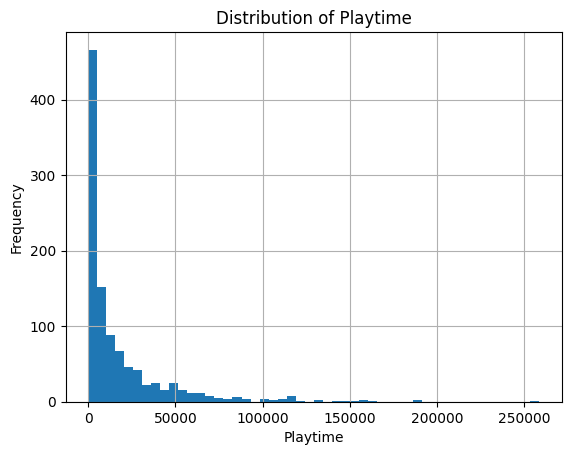

In [ ]:
import matplotlib.pyplot as plt

df['playtime_forever'].hist(bins=50)
plt.title('Distribution of Playtime')
plt.xlabel('Playtime')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['genres'].value_counts

<bound method IndexOpsMixin.value_counts of 0       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
1       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
2       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
3       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
4       ['Linear' 'FPS' 'Singleplayer' 'Action' 'Atmos...
                              ...                        
1036    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1037    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1038    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1039    ['e-sports' 'Strategy' 'FPS' 'Action' 'PvP' 'T...
1040    ['War' 'First-Person' 'Action' 'Shooter' 'Mult...
Name: genres, Length: 1041, dtype: object>

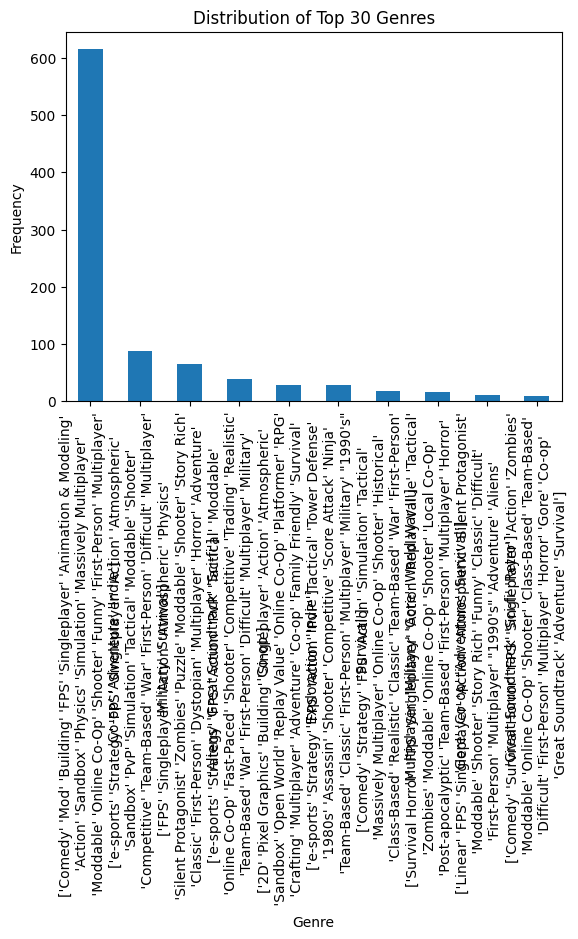

In [ ]:
df['genres'].value_counts()[:10].plot(kind='bar')
plt.title('Distribution of Top 30 Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # This will rotate the x-axis labels so they don't overlap
plt.show()

In [ ]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'i_dont_give_a_jacks_ass'